## CosmicFish v1.0

In [1]:
#Importing main module
from cosmicfishpie.fishermatrix import cosmicfish
import os

In [2]:
envkey = 'OMP_NUM_THREADS'
# Set this environment variable to the number of available cores in your machine, 
# to get a fast execution of the Einstein Boltzmann Solver
print("The value of {:s} is: ".format(envkey), os.environ.get(envkey))
os.environ[envkey] = str(8)
print("The value of {:s} is: ".format(envkey), os.environ.get(envkey))

The value of OMP_NUM_THREADS is:  None
The value of OMP_NUM_THREADS is:  8


## Define options and load External files. Use STEM derivatives.

In [3]:

external = {'directory': '../../../cosmicfish_reloaded/external_input/default_camb_euclid_w0wa_HP/',  ## Files should be in the input4cast format
            'paramnames': ['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'w0','wa'],  ## Certain paramnames like Omegam and h are obligatory
            'folder_paramnames': ['Om', 'Ob', 'h', 'ns', 's8', 'w0', 'wa'],   ## Folder paramnames can have different names as paramnames
            'file_prefixes' : ['background_Hz','D_Growth-zk',  
                               'f_GrowthRate-zk', 'Plin-zk',    ## Names of cosmological quantity files can be specified here
                               'Pnonlin-zk', 'sigma8-z'],
            'k-units' : 'h/Mpc',   ## Units of the external input files
            'r-units' : 'Mpc',      
            'eps_values': [0.00625, 0.01, 0.0125, 0.01875, 0.02, 0.025, 0.03, 0.0375, 0.05, 0.10]   
            ## Epsilon parameter variations at which files were computed
            } 

fiducial = {"Omegam":0.32,
            "Omegab":0.05,
            "h":0.67,
            "ns":0.96,          ## Fiducial values of the cosmological parameters
            "sigma8":0.815584,
            "w0":-1.0,
            "wa":0.
            }
## Fiducial values of the nuisance parameters are set by default when specifying the survey below. Can be added also manually.
freepars = {"Omegam":0.01,
            "Omegab":0.01 ,
            "h":0.01,           
            "ns":0.01,        ## If derivatives are calculated with 3PT, this sets the epsilon step size, per parameter. 
            "sigma8":0.01,      ## Should match one of the epsilons available above
            "w0":0.01,
            "wa":0.01
            } 

## CosmicFish in all modes

In [4]:
Photometric_fish_dic = dict()
Spectroscopic_fish_dic = dict()

In [5]:
specifications = ['Euclid-ISTF-Optimistic', 'Rubin-Optimistic']

for specif in specifications:
    options = {
           'derivatives': '3PT',      ## Derivative option: 3PT or SteM
           'accuracy': 1,
           'feedback': 1,
           'code': 'external',
           'outroot': 'w0waCDM_external_camb_HP-{}'.format(specif),    #String attached to all the results files
           'results_dir' :  './results/',
           'specs_dir' : '../survey_specifications/', 
           'survey_name': specif,
           'cosmo_model' : 'w0waCDM',
           'activateMG': False
           }
    observables = ['WL','GCph']

    cosmoFM = cosmicfish.FisherMatrix(fiducialpars=fiducial,    #Pass the above dictionaries to cosmoFM, the main cosmicfish class
                              freepars=freepars,
                              options=options, 
                              observables=observables, 
                              extfiles=external, 
                              cosmoModel=options['cosmo_model'], 
                              surveyName=options['survey_name']
                              )
                            
    Photometric_fish_dic[options['outroot']] = cosmoFM.compute()    # Compute the Fisher Matrix



**************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ 

**************************************************************
 This is the new Python version of the CosmicFish code.
**************************************************************
Using input files for cosmology observables.
External directory:  ../../../cosmicfish_reloaded/external_input/default_camb_euclid_w0wa_HP/
20 subfolders for parameter Om
External directory:  ../../../cosmicfish_reloaded/external_input/default_camb_euclid_w0wa_HP/
20 subfolders for parameter Ob
External directory:  ../../../cosmicfish_reloaded/external_input/default_camb_euclid_w0wa_HP/
20 subfolders for parameter h
External directory:  ../../../cosmicfish_reloaded/external_input/default_camb_euclid_w0wa_HP/
20 subfolders for parameter ns
External directory:  ../../../cosm

2023-11-25 09:50:33,670	INFO worker.py:1673 -- Started a local Ray instance.



In class: ComputeCls  -> Started Cls calculation

In class: ComputeCls  ---> Cosmological functions obtained in   0.08 s
***
Numerical specifications: 
WL ell max =  5000
GCph ell max =  3000
ell min =  10
ell max =  5000
ell sampling:  100
z sampling:  200
z_min :  0.001
z_max :  2.5
z_max :  2.5
delta_z :  0.012557788944723619
***

Computing fiducial

In class: ComputeCls  -> Started Cls calculation

In class: ComputeCls  ---> Cosmological functions obtained in   0.00 s

In class: ComputeCls  -> Computing power spectra and kernels 

In class: ComputeCls  --> Total Cls computation performed in :   1.40 s

Fiducial generated in 1.48 s

Noise added to fiducial

Noisy Cls generated in 0.00 s

Computed covariance matrix

Covmat of Cls generated in 0.48 s

Total calculation in 1.96 s
>> computing derivs >>

  +++ Computing derivative on Omegam

In class: ComputeCls  -> Started Cls calculation

In class: ComputeCls  ---> Cosmological functions obtained in   0.09 s

In class: ComputeCls  ->

2023-11-25 09:51:47,670	INFO worker.py:1673 -- Started a local Ray instance.



In class: ComputeCls  -> Started Cls calculation

In class: ComputeCls  ---> Cosmological functions obtained in   0.10 s
***
Numerical specifications: 
WL ell max =  5000
GCph ell max =  1500
ell min =  10
ell max =  5000
ell sampling:  100
z sampling:  200
z_min :  0.001
z_max :  2.5
z_max :  2.5
delta_z :  0.012557788944723619
***

Computing fiducial

In class: ComputeCls  -> Started Cls calculation

In class: ComputeCls  ---> Cosmological functions obtained in   0.00 s

In class: ComputeCls  -> Computing power spectra and kernels 

In class: ComputeCls  --> Total Cls computation performed in :   1.47 s

Fiducial generated in 1.56 s

Noise added to fiducial

Noisy Cls generated in 0.00 s

Computed covariance matrix

Covmat of Cls generated in 0.52 s

Total calculation in 2.08 s
>> computing derivs >>

  +++ Computing derivative on Omegam

In class: ComputeCls  -> Started Cls calculation

In class: ComputeCls  ---> Cosmological functions obtained in   0.09 s

In class: ComputeCls  ->

In [6]:
specifications = ['Euclid-ISTF-Optimistic', 'DESI_BGS', 'DESI_ELG']
for specif in specifications:
    options = {
           'derivatives': '3PT',      ## Derivative option: 3PT or STEM of 4PT_FWD
           'accuracy': 1,
           'feedback': 1,
           'code': 'external',
           'outroot': 'w0waCDM_external_camb_HP-3PT-{}'.format(specif),    #String attached to all the results files
           'results_dir' :  './results/',
           'specs_dir' : '../survey_specifications/', 
           'survey_name': specif,
           'cosmo_model' : 'w0waCDM',
           'activateMG': False}
    observables = ['GCsp']

    cosmoFM = cosmicfish.FisherMatrix(fiducialpars=fiducial,    #Pass the above dictionaries to cosmoFM, the main cosmicfish class
                              freepars=freepars,
                              options=options, 
                              observables=observables, 
                              extfiles=external, 
                              cosmoModel=options['cosmo_model'], 
                              surveyName=options['survey_name']
                              )
                            
    Spectroscopic_fish_dic[options['outroot']] = cosmoFM.compute()    # Compute the Fisher Matrix

**************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ 

**************************************************************
 This is the new Python version of the CosmicFish code.
**************************************************************
Using input files for cosmology observables.
External directory:  ../../../cosmicfish_reloaded/external_input/default_camb_euclid_w0wa_HP/
20 subfolders for parameter Om
External directory:  ../../../cosmicfish_reloaded/external_input/default_camb_euclid_w0wa_HP/
20 subfolders for parameter Ob
External directory:  ../../../cosmicfish_reloaded/external_input/default_camb_euclid_w0wa_HP/
20 subfolders for parameter h
External directory:  ../../../cosmicfish_reloaded/external_input/default_camb_euclid_w0wa_HP/
20 subfolders for parameter ns
External directory:  ../../../cosm

2023-11-25 09:53:00,901	INFO worker.py:1673 -- Started a local Ray instance.



In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.00 s
Entering Cov gg term

In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.00 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.24 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.21 s

In class: FisherMatrix  +++ Volumes computation computed in:   0.85 s
Computing derivatives of Galaxy Clustering Spectro
>> Computing Derivs >>

  +++ Computing derivative on Omegam

In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.09 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took

2023-11-25 09:53:28,576	INFO worker.py:1673 -- Started a local Ray instance.



In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.00 s
Entering Cov gg term

In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.00 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.21 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.21 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.19 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.19 s

In class: FisherMatrix  +++ Volumes computation computed in:   1.00 s
Computing derivatives of Galaxy Clustering Spectro
>> Computing Derivs >>

  +++ Computing derivative on Omegam

In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.09 s

In class: ComputeGalSpectro  observed P_gg computation took

2023-11-25 09:54:02,916	INFO worker.py:1673 -- Started a local Ray instance.



In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.00 s
Entering Cov gg term

In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.00 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.21 s

In class: Comp

In [7]:
cosmoFM.derivs_dict.keys()

dict_keys(['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'w0', 'wa', 'lnbgs8_1', 'lnbgs8_2', 'lnbgs8_3', 'lnbgs8_4', 'lnbgs8_5', 'lnbgs8_6', 'lnbgs8_7', 'lnbgs8_8', 'lnbgs8_9', 'lnbgs8_10', 'lnbgs8_11', 'Ps_1', 'Ps_2', 'Ps_3', 'Ps_4', 'Ps_5', 'Ps_6', 'Ps_7', 'Ps_8', 'Ps_9', 'Ps_10', 'Ps_11'])

# Plot the resulting Fisher matrices

In [21]:
from cosmicfishpie.analysis import fisher_plotting as fpp
from cosmicfishpie.analysis import fisher_matrix as fm
from cosmicfishpie.analysis import fisher_operations as fo
import seaborn as sns
snscolors=sns.color_palette("colorblind")
snscolors

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

## Comparing the forecasts of different experiments
 - One can add Fisher matrices by just using the addition operator
 - One can marginalize over nuisance parameters
 - One can fix nuisance parameters (maximize them)

In [22]:
Photometric_fish_dic.keys()

dict_keys(['w0waCDM_external_camb_HP-Euclid-ISTF-Optimistic', 'w0waCDM_external_camb_HP-Rubin-Optimistic'])

In [23]:
Spectroscopic_fish_dic.keys()

dict_keys(['w0waCDM_external_camb_HP-3PT-Euclid-ISTF-Optimistic', 'w0waCDM_external_camb_HP-3PT-DESI_BGS', 'w0waCDM_external_camb_HP-3PT-DESI_ELG'])

### GC spectro observations: DESI ELG+BGS 

In [24]:
Fisher_DESI_ELG = Spectroscopic_fish_dic['w0waCDM_external_camb_HP-3PT-DESI_ELG']
print(Fisher_DESI_ELG.get_param_names())
Fisher_DESI_BGS = Spectroscopic_fish_dic['w0waCDM_external_camb_HP-3PT-DESI_BGS']
print(Fisher_DESI_BGS.get_param_names())
#Fisher_DESI_EplusB = Fisher_DESI_ELG + Fisher_DESI_BGS
#Fisher_DESI_EplusB.get_param_names()

['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'w0', 'wa', 'lnbgs8_1', 'lnbgs8_2', 'lnbgs8_3', 'lnbgs8_4', 'lnbgs8_5', 'lnbgs8_6', 'lnbgs8_7', 'lnbgs8_8', 'lnbgs8_9', 'lnbgs8_10', 'lnbgs8_11', 'Ps_1', 'Ps_2', 'Ps_3', 'Ps_4', 'Ps_5', 'Ps_6', 'Ps_7', 'Ps_8', 'Ps_9', 'Ps_10', 'Ps_11']
['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'w0', 'wa', 'lnbBgs8_1', 'lnbBgs8_2', 'lnbBgs8_3', 'lnbBgs8_4', 'lnbBgs8_5', 'PsB_1', 'PsB_2', 'PsB_3', 'PsB_4', 'PsB_5']


#### Nuisance parameters from each of these surveys are defined at different redshifts and values despite having same names. We need to rename them in order to be able to add them.

In [25]:
Fisher_DESI_BGS.set_param_names?

Signature: Fisher_DESI_BGS.set_param_names(param_names)
Docstring:
Function sets a new list of param names substituting the old one. Notice that
latex parameter names will be reset.

:param param_names: list containing the new parameter names.
:type param_names: :class:`list` of :class:`string`
File:      ~/CosmoProjects/cosmicfish_release/cosmicfishpie/cosmicfishpie/analysis/fisher_matrix.py
Type:      method

-  We choose to reset the values for the survey with less nuisance parameters DESI_BGS

In [26]:
Fisher_DESI_BGS.set_param_names(['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'w0', 'wa', 'lnbBgs8_1', 'lnbBgs8_2', 'lnbBgs8_3', 'lnbBgs8_4', 'lnbBgs8_5', 'PsB_1', 'PsB_2', 'PsB_3', 'PsB_4', 'PsB_5'])

- The LaTeX paramnames have been reset by this operation, so we need to set new ones

In [29]:
print(Fisher_DESI_ELG.get_param_names_latex())

['\\Omega_{{\\rm m}, 0}', '\\Omega_{{\\rm b}, 0}', 'h', 'n_{\\rm s}', '\\sigma_8', 'w_0', 'w_a', '\\ln(b_g \\sigma_8)_1', '\\ln(b_g \\sigma_8)_2', '\\ln(b_g \\sigma_8)_3', '\\ln(b_g \\sigma_8)_4', '\\ln(b_g \\sigma_8)_5', '\\ln(b_g \\sigma_8)_6', '\\ln(b_g \\sigma_8)_7', '\\ln(b_g \\sigma_8)_8', '\\ln(b_g \\sigma_8)_9', '\\ln(b_g \\sigma_8)_10', '\\ln(b_g \\sigma_8)_11', 'P_{S1}', 'P_{S2}', 'P_{S3}', 'P_{S4}', 'Ps_5', 'Ps_6', 'Ps_7', 'Ps_8', 'Ps_9', 'Ps_10', 'Ps_11']


In [31]:
Fisher_DESI_BGS.set_param_names_latex(['\\Omega_{{\\rm m}, 0}', '\\Omega_{{\\rm b}, 0}', 'h', 'n_{\\rm s}', '\\sigma_8', 'w_0', 'w_a', '\\ln(b_{B,g} \\sigma_8)_1', '\\ln(b_{B,g} \\sigma_8)_2', '\\ln(b_{B,g} \\sigma_8)_3', '\\ln(b_{B,g} \\sigma_8)_4', '\\ln(b_{B,g} \\sigma_8)_5', '\P_{B,S1}', 'P_{B,S2}', 'P_{B,S3}', 'P_{B,S4}', 'P_{B,S5}'])

#### Now we add the Fisher matrices

In [33]:
Fisher_DESI_EB_full = Fisher_DESI_ELG + Fisher_DESI_BGS

In [35]:
print(Fisher_DESI_EB_full.get_param_names())

['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'w0', 'wa', 'lnbgs8_1', 'lnbgs8_2', 'lnbgs8_3', 'lnbgs8_4', 'lnbgs8_5', 'lnbgs8_6', 'lnbgs8_7', 'lnbgs8_8', 'lnbgs8_9', 'lnbgs8_10', 'lnbgs8_11', 'Ps_1', 'Ps_2', 'Ps_3', 'Ps_4', 'Ps_5', 'Ps_6', 'Ps_7', 'Ps_8', 'Ps_9', 'Ps_10', 'Ps_11', 'lnbBgs8_1', 'lnbBgs8_2', 'lnbBgs8_3', 'lnbBgs8_4', 'lnbBgs8_5', 'PsB_1', 'PsB_2', 'PsB_3', 'PsB_4', 'PsB_5']


#### One can also add the Fisher matrices after marginalizing or fixing the nuisance parameters, leaving only the cosmological ones

In [37]:
fo.reshuffle?

Signature: fo.reshuffle(fisher_matrix, names, update_names=True)
Docstring:
This function reshuffles a Fisher matrix. The new Fisher matrix will have the
parameters specified in names, in the order specified by names.
Can be used to delete parameters, change their order or extract the Fisher
for some parameters without marginalizing over the others.

:param fisher_matrix: input Fisher matrix
:type fisher_matrix: :class:`cosmicfish_pylib.fisher_matrix.fisher_matrix`
:param names: list of names of the parameters that are desired in the output Fisher
    matrix, in the desired order.
:type names: :class:`list` of :class:`string`
:returns: A Fisher matrix with the new parameters
:rtype: :class:`cosmicfish_pylib.fisher_matrix.fisher_matrix`
File:      ~/CosmoProjects/cosmicfish_release/cosmicfishpie/cosmicfishpie/analysis/fisher_operations.py
Type:      function

In [42]:
cosmoparams = ['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'w0', 'wa']

In [43]:
Fisher_DESI_ELG_marg = fo.marginalise(Fisher_DESI_ELG, names=cosmoparams)
Fisher_DESI_ELG_fix = fo.reshuffle(Fisher_DESI_ELG, names=cosmoparams)

In [44]:
Fisher_DESI_BGS_marg = fo.marginalise(Fisher_DESI_BGS, names=cosmoparams)
Fisher_DESI_BGS_fix = fo.reshuffle(Fisher_DESI_BGS, names=cosmoparams)

In [45]:
Fisher_DESI_EB_marg = Fisher_DESI_ELG_marg+Fisher_DESI_BGS_marg
Fisher_DESI_EB_fix = Fisher_DESI_ELG_fix+Fisher_DESI_BGS_fix

#### Now let's compare their 1 $\sigma$ bounds

./plots  exists already
Fisher matrix loaded, label name:  DESI BGS
Fisher matrix loaded, label name:  DESI ELG
Fisher matrix loaded, label name:  DESI BGS+ELG (marg. nuisance)
Fisher matrix loaded, label name:  DESI BGS+ELG (fix nuisance)
Fisher matrix loaded, label name:  DESI BGS+ELG (full)
('Fishers names: ', ['DESI BGS', 'DESI ELG', 'DESI BGS+ELG (marg. nuisance)', 'DESI BGS+ELG (fix nuisance)', 'DESI BGS+ELG (full)'])
('parameters to plot: ', ['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'w0', 'wa'])
X tick labels ---> :   ['\\Omega_{{\\rm m}, 0}', '\\Omega_{{\\rm b}, 0}', 'h', 'n_{\\rm s}', '\\sigma_8', 'w_0', 'w_a']
('Fisher name: ', 'DESI BGS_marginal')
('Parameter names latex: ', ['$\\Omega_{{\\rm m}, 0}$', '$\\Omega_{{\\rm b}, 0}$', '$h$', '$n_{\\rm s}$', '$\\sigma_8$', '$w_0$', '$w_a$'])
('Marginalized 1-sigma errors :', array([0.01638421, 0.00378323, 0.00828567, 0.03678988, 0.02604857,
       0.21100433, 0.87575557]))
('Unmarginalized 1-sigma errors :', array([0.00354246, 0.00

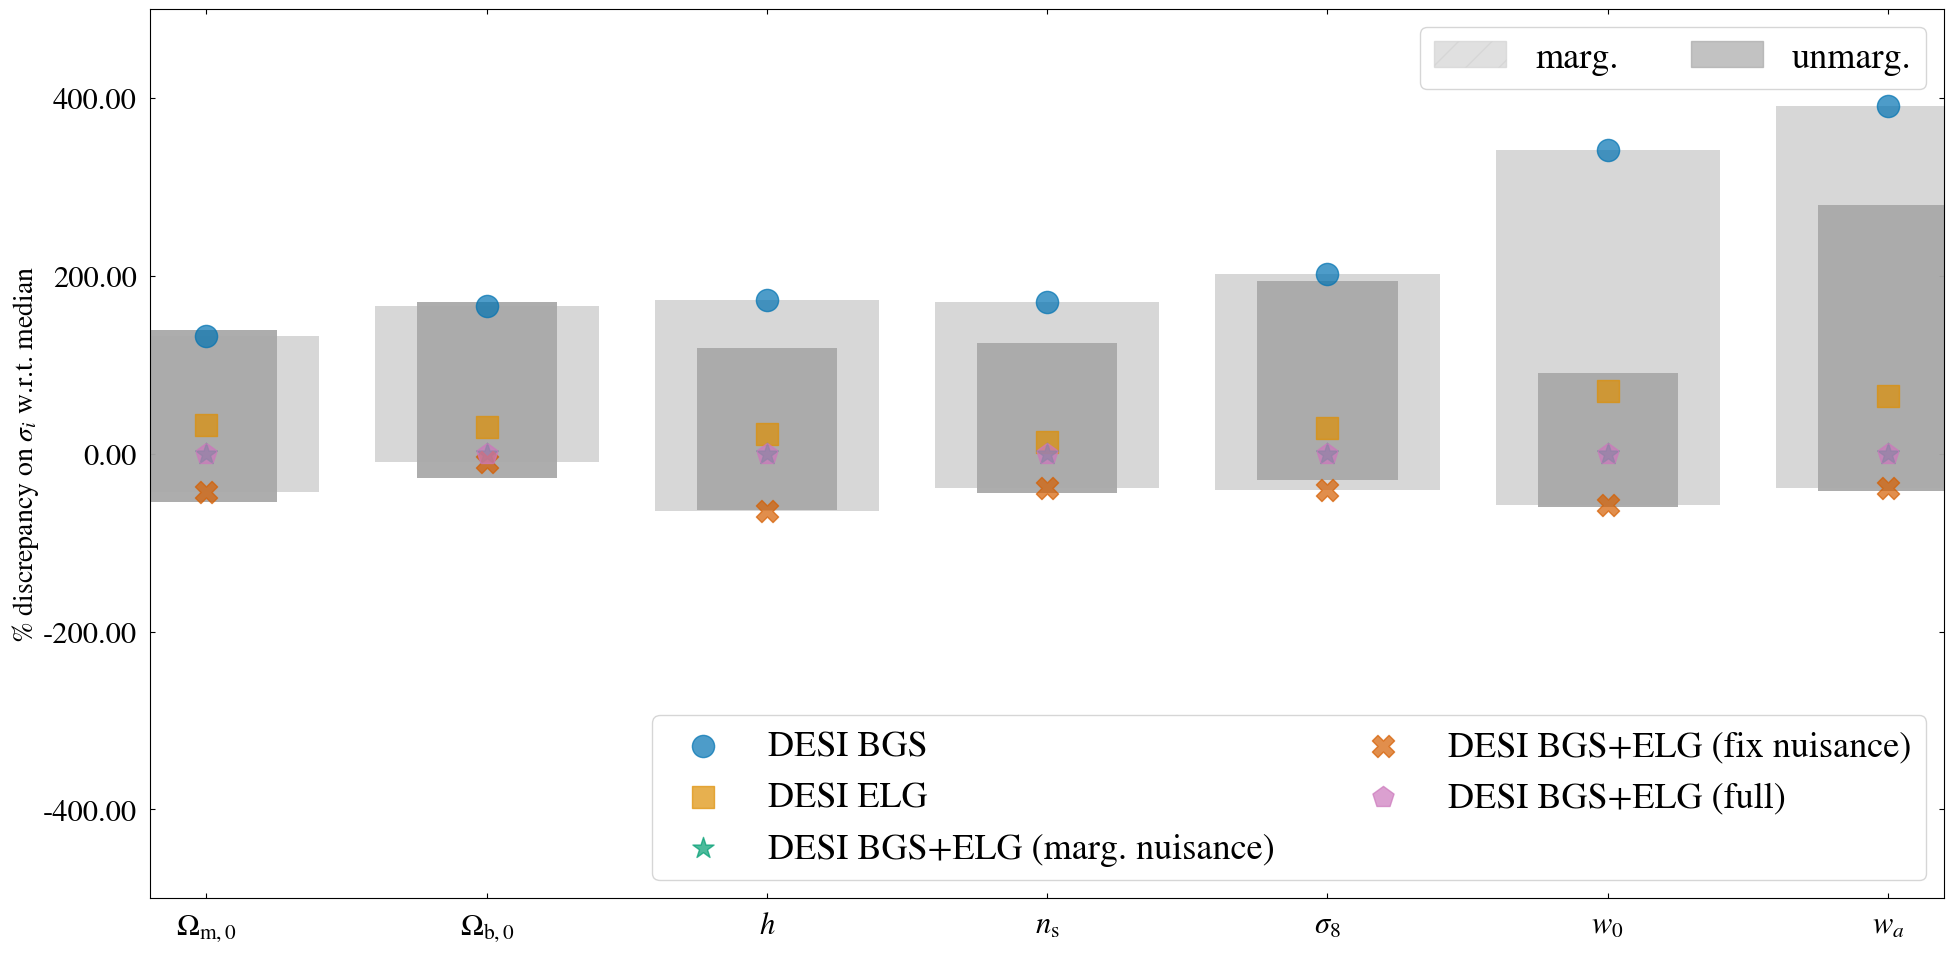

In [50]:
plot_options = {'fishers_list': [Fisher_DESI_BGS, Fisher_DESI_ELG, Fisher_DESI_EB_marg, Fisher_DESI_EB_fix, Fisher_DESI_EB_full], 
                'colors': snscolors,
                'fish_labels': ['DESI BGS','DESI ELG', 'DESI BGS+ELG (marg. nuisance)', 'DESI BGS+ELG (fix nuisance)', 'DESI BGS+ELG (full)'],
                'filled': False,
                'plot_pars': cosmoparams,
                'axis_custom_factors': {'all':3},  ## Axis limits cover 3-sigma bounds of first Fisher matrix
                'plot_method': 'Gaussian',
                'file_format': '.pdf',   ##file format for all the plots
                'outpath' : './plots/',  ## directory where to store the files, if non-existent, it will be created
                'outroot':'DESI-GCspec_comparison_BGS_ELG_w0waCDM'  ## file name root for all the plots, extra names can be added individually
                } 

fish_plotter = fpp.fisher_plotting(**plot_options)
#fish_plotter.plot_fisher(filled=False)
fish_plotter.compare_errors(options={'yrang' : [-500, 500], 'ncol_legend': 2})

#### As expected we can see:
- BGS is a much less constraining probe than ELG
- Fixing the nuisance parameters provides the smallest errors on the full combination
- Marginalizing first over the nuisances and adding Fisher matrices is the same as adding them in full and then marginalizing over the nuisance parameters.

---> Fisher matrix name:  DESI BGS
Fisher matrix fiducials: 
 [ 0.32      0.05      0.67      0.96      0.815584 -1.        0.
  0.080237  0.043715  0.006432 -0.030995 -0.068079  0.        0.
  0.        0.        0.      ]
Fisher matrix 1-sigma bounds: 
 [1.63842108e-02 3.78323204e-03 8.28566922e-03 3.67898755e-02
 2.60485713e-02 2.11004331e-01 8.75755565e-01 1.75844493e-02
 2.10761170e-02 2.42670601e-02 2.56470133e-02 2.71986187e-02
 1.75452280e+02 8.74542266e+01 6.95319827e+01 6.94831364e+01
 1.16117205e+02]
Fisher matrix param names: 
 ['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'w0', 'wa', 'lnbBgs8_1', 'lnbBgs8_2', 'lnbBgs8_3', 'lnbBgs8_4', 'lnbBgs8_5', 'PsB_1', 'PsB_2', 'PsB_3', 'PsB_4', 'PsB_5']
Fisher matrix param names latex: 
 ['\\Omega_{{\\rm m}, 0}', '\\Omega_{{\\rm b}, 0}', 'h', 'n_{\\rm s}', '\\sigma_8', 'w_0', 'w_a', '\\ln(b_{B,g} \\sigma_8)_1', '\\ln(b_{B,g} \\sigma_8)_2', '\\ln(b_{B,g} \\sigma_8)_3', '\\ln(b_{B,g} \\sigma_8)_4', '\\ln(b_{B,g} \\sigma_8)_5', '\\P_{B,S1}',

/home/santiago/CosmoProjects/cosmicfish_release/cosmicfishpie/cosmicfishpie/analysis/fisher_plotting.py:240: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.savefig(
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


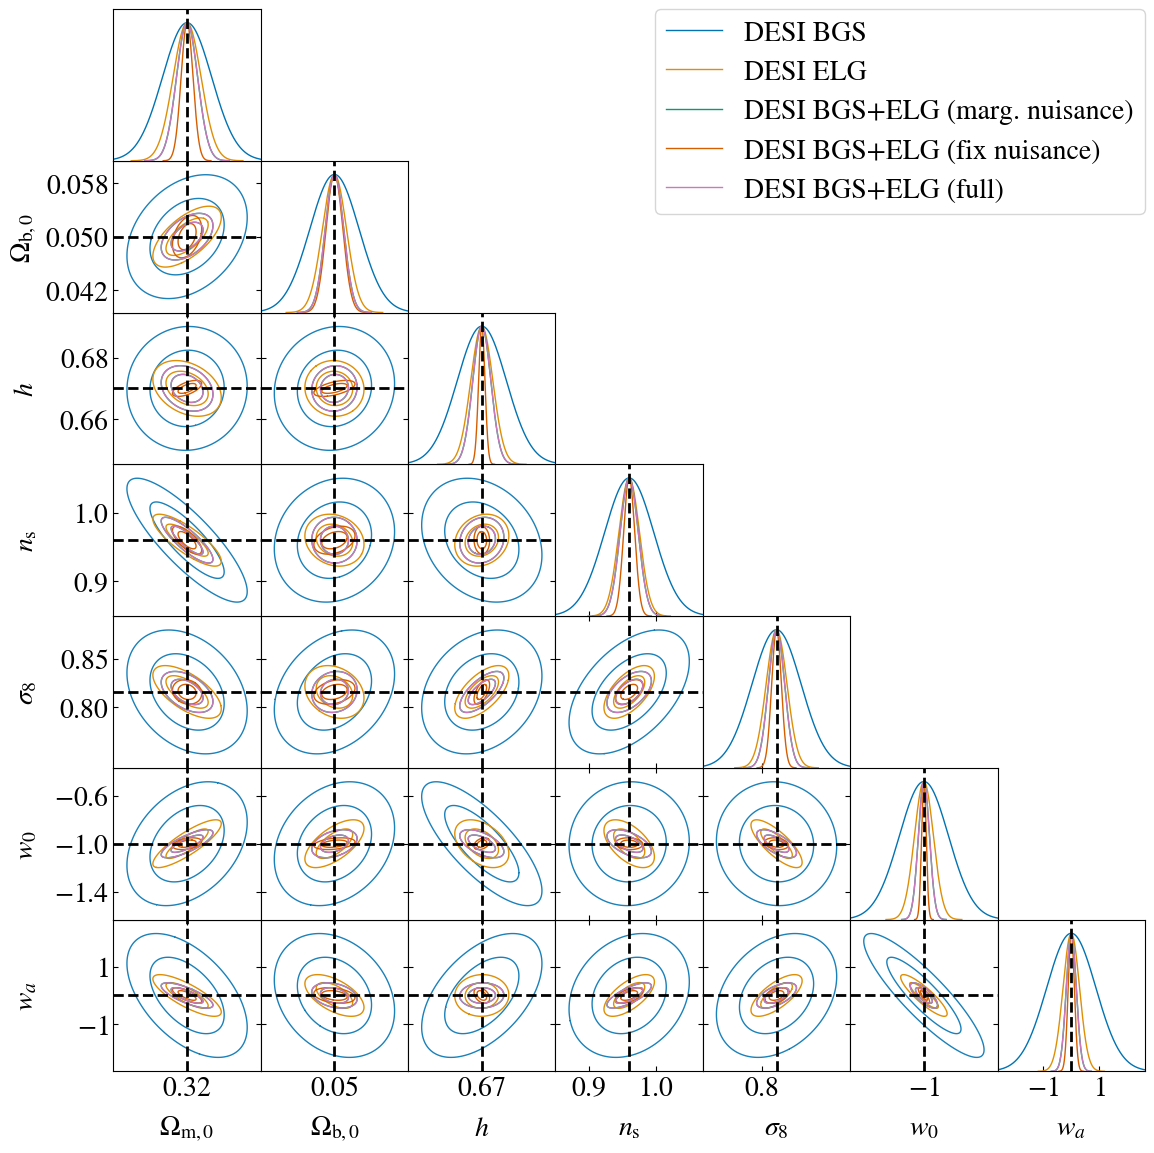

In [51]:
fish_plotter.plot_fisher(filled=False)

### Combine Spectroscopic and Photometric observations

In [52]:
Spectroscopic_fish_dic.keys()

dict_keys(['w0waCDM_external_camb_HP-3PT-Euclid-ISTF-Optimistic', 'w0waCDM_external_camb_HP-3PT-DESI_BGS', 'w0waCDM_external_camb_HP-3PT-DESI_ELG'])

In [53]:
Photometric_fish_dic.keys()

dict_keys(['w0waCDM_external_camb_HP-Euclid-ISTF-Optimistic', 'w0waCDM_external_camb_HP-Rubin-Optimistic'])

In [55]:
Fisher_Rubin_3x2photo = Photometric_fish_dic['w0waCDM_external_camb_HP-Rubin-Optimistic']
Fisher_Euclid_3x2photo = Photometric_fish_dic['w0waCDM_external_camb_HP-Euclid-ISTF-Optimistic']
Fisher_Euclid_GCspectro = Spectroscopic_fish_dic['w0waCDM_external_camb_HP-3PT-Euclid-ISTF-Optimistic']

In [63]:
Fisher_Euclid_combined = Fisher_Euclid_GCspectro + Fisher_Euclid_3x2photo
print("Euclid Combined Fisher matrix for GC spectro + 3x2pt photometric")
for pp,ff,ss in zip(Fisher_Euclid_combined.get_param_names(), Fisher_Euclid_combined.get_param_fiducial(), Fisher_Euclid_combined.get_confidence_bounds()):
    print("Parameter name {:s}, fiducial={:.4f}, 1sigma bound: {:.2e}".format(pp,ff,ss))

Euclid Combined Fisher matrix for GC spectro + 3x2pt photometric
Parameter name Omegam, fiducial=0.3200, 1sigma bound: 1.87e-03
Parameter name Omegab, fiducial=0.0500, 1sigma bound: 7.20e-04
Parameter name h, fiducial=0.6700, 1sigma bound: 1.10e-03
Parameter name ns, fiducial=0.9600, 1sigma bound: 1.86e-03
Parameter name sigma8, fiducial=0.8156, 1sigma bound: 1.89e-03
Parameter name w0, fiducial=-1.0000, 1sigma bound: 2.53e-02
Parameter name wa, fiducial=0.0000, 1sigma bound: 9.32e-02
Parameter name lnbgs8_1, fiducial=-0.3254, 1sigma bound: 3.40e-03
Parameter name lnbgs8_2, fiducial=-0.3159, 1sigma bound: 3.41e-03
Parameter name lnbgs8_3, fiducial=-0.3115, 1sigma bound: 3.47e-03
Parameter name lnbgs8_4, fiducial=-0.3202, 1sigma bound: 3.47e-03
Parameter name Ps_1, fiducial=0.0000, 1sigma bound: 1.35e+01
Parameter name Ps_2, fiducial=0.0000, 1sigma bound: 1.40e+01
Parameter name Ps_3, fiducial=0.0000, 1sigma bound: 1.55e+01
Parameter name Ps_4, fiducial=0.0000, 1sigma bound: 1.65e+01
Pa

In [64]:
Fisher_RubinDESI_combined = Fisher_DESI_EB_full + Fisher_Rubin_3x2photo
print("Rubin+DESI Combined Fisher matrix for GC spectro + 3x2pt photometric")
for pp,ff,ss in zip(Fisher_RubinDESI_combined.get_param_names(), Fisher_RubinDESI_combined.get_param_fiducial(), Fisher_RubinDESI_combined.get_confidence_bounds()):
    print("Parameter name {:s}, fiducial={:.4f}, 1sigma bound: {:.2e}".format(pp,ff,ss))

Rubin+DESI Combined Fisher matrix for GC spectro + 3x2pt photometric
Parameter name Omegam, fiducial=0.3200, 1sigma bound: 2.10e-03
Parameter name Omegab, fiducial=0.0500, 1sigma bound: 7.56e-04
Parameter name h, fiducial=0.6700, 1sigma bound: 1.07e-03
Parameter name ns, fiducial=0.9600, 1sigma bound: 2.72e-03
Parameter name sigma8, fiducial=0.8156, 1sigma bound: 2.18e-03
Parameter name w0, fiducial=-1.0000, 1sigma bound: 2.33e-02
Parameter name wa, fiducial=0.0000, 1sigma bound: 8.45e-02
Parameter name lnbgs8_1, fiducial=-0.5236, 1sigma bound: 7.21e-03
Parameter name lnbgs8_2, fiducial=-0.5437, 1sigma bound: 4.47e-03
Parameter name lnbgs8_3, fiducial=-0.5621, 1sigma bound: 4.59e-03
Parameter name lnbgs8_4, fiducial=-0.5786, 1sigma bound: 4.56e-03
Parameter name lnbgs8_5, fiducial=-0.5935, 1sigma bound: 4.87e-03
Parameter name lnbgs8_6, fiducial=-0.6067, 1sigma bound: 4.97e-03
Parameter name lnbgs8_7, fiducial=-0.6185, 1sigma bound: 5.01e-03
Parameter name lnbgs8_8, fiducial=-0.6290, 1

./plots  exists already
Fisher matrix loaded, label name:  Euclid GCsp
Fisher matrix loaded, label name:  DESI ELG+BGS GCsp
Fisher matrix loaded, label name:  Euclid GCsp + 3x2photo
Fisher matrix loaded, label name:  DESI ELG+BGS GCsp + Rubin 3x2photo
---> Fisher matrix name:  Euclid GCsp
Fisher matrix fiducials: 
 [ 0.32      0.05      0.67      0.96      0.815584 -1.        0.
 -0.32542  -0.315907 -0.311537 -0.320178  0.        0.        0.
  0.      ]
Fisher matrix 1-sigma bounds: 
 [9.62682961e-03 1.87774851e-03 3.21677525e-03 1.26588416e-02
 1.19408366e-02 8.99859049e-02 2.94742971e-01 1.37158349e-02
 1.35494072e-02 1.34452607e-02 1.33226352e-02 1.96243942e+01
 1.95884596e+01 2.08545559e+01 2.18899879e+01]
Fisher matrix param names: 
 ['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'w0', 'wa', 'lnbgs8_1', 'lnbgs8_2', 'lnbgs8_3', 'lnbgs8_4', 'Ps_1', 'Ps_2', 'Ps_3', 'Ps_4']
Fisher matrix param names latex: 
 ['\\Omega_{{\\rm m}, 0}', '\\Omega_{{\\rm b}, 0}', 'h', 'n_{\\rm s}', '\\sigma_8'

/home/santiago/CosmoProjects/cosmicfish_release/cosmicfishpie/cosmicfishpie/analysis/fisher_plotting.py:240: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.savefig(
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


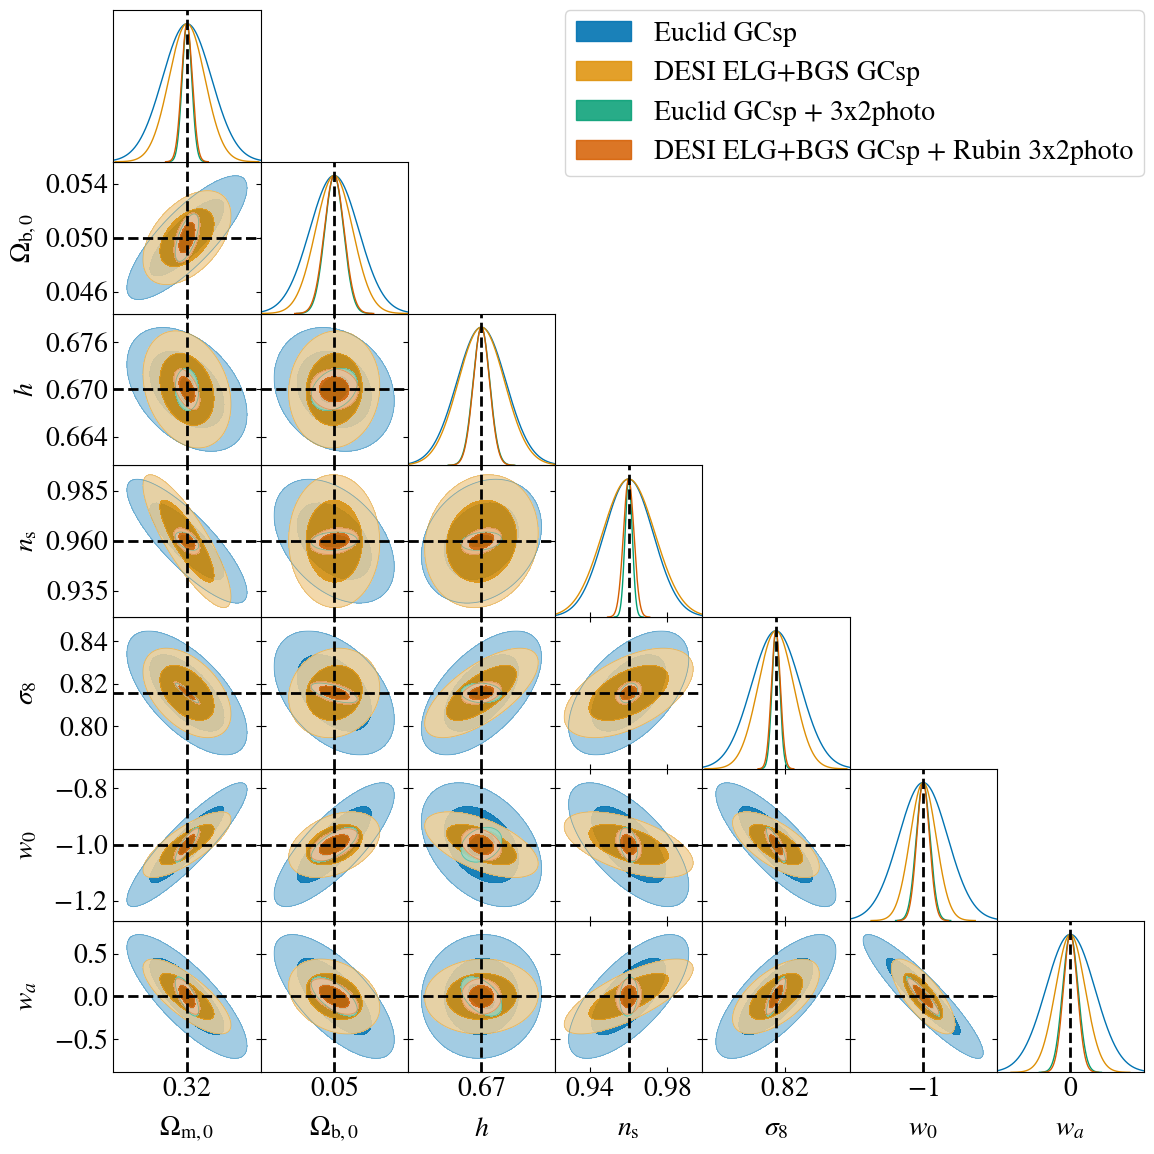

In [65]:
plot_options = {'fishers_list': [Fisher_Euclid_GCspectro, Fisher_DESI_EB_full, 
                                 Fisher_Euclid_combined, Fisher_RubinDESI_combined], 
                'colors': snscolors,
                'fish_labels': ['Euclid GCsp', 'DESI ELG+BGS GCsp', 'Euclid GCsp + 3x2photo', 'DESI ELG+BGS GCsp + Rubin 3x2photo'],
                'filled': False,
                'plot_pars': cosmoparams,
                'axis_custom_factors': {'all':3},  ## Axis limits cover 3-sigma bounds of first Fisher matrix
                'plot_method': 'Gaussian',
                'file_format': '.pdf',   ##file format for all the plots
                'outpath' : './plots/',  ## directory where to store the files, if non-existent, it will be created
                'outroot':'Euclid-Rubin-DESI-combined_w0waCDM'  ## file name root for all the plots, extra names can be added individually
                } 

fish_plotter = fpp.fisher_plotting(**plot_options)
fish_plotter.plot_fisher(filled=True)

#### Compute FoM 

In [74]:
import numpy as np

In [75]:
Fisher_Euclid_combined_w0wa_marg = fo.marginalise(Fisher_Euclid_combined, names=['w0', 'wa'])
print("Euclid combined total DE FoM = {:.2f}".format(np.sqrt(Fisher_Euclid_combined_w0wa_marg.determinant())))

Euclid combined total DE FoM = 1223.25


In [76]:
Fisher_RubinDESI_combined_w0wa_marg = fo.marginalise(Fisher_RubinDESI_combined, names=['w0', 'wa'])
print("Rubin + DESI combined total DE FoM = {:.2f}".format(np.sqrt(Fisher_RubinDESI_combined_w0wa_marg.determinant())))

Rubin + DESI combined total DE FoM = 1089.60


In [ ]:
print(Fisher_RubinDESI_combined_w0wa_marg.fisher_matrix)
print(Fisher_Euclid_combined_w0wa_marg.fisher_matrix)

[[8485.21399349 2067.74783817]
 [2067.74783817  643.80454274]]
[[13007.68912635  3306.09055152]
 [ 3306.09055152   955.32495019]]


./plots  exists already
Fisher matrix loaded, label name:  Euclid GCsp + 3x2photo
Fisher matrix loaded, label name:  DESI ELG+BGS GCsp + Rubin 3x2photo
---> Fisher matrix name:  Euclid GCsp + 3x2photo
Fisher matrix fiducials: 
 [ 0.32      0.05      0.67      0.96      0.815584 -1.        0.
 -0.32542  -0.315907 -0.311537 -0.320178  0.        0.        0.
  0.        1.099773  1.220246  1.272399  1.316624  1.358124  1.399821
  1.444645  1.496496  1.565248  1.742986  1.72      2.17     -0.41    ]
Fisher matrix 1-sigma bounds: 
 [1.87444722e-03 7.19578795e-04 1.09560483e-03 1.85916358e-03
 1.89305840e-03 2.52679809e-02 9.32384518e-02 3.39965463e-03
 3.41051205e-03 3.46979392e-03 3.47498229e-03 1.35203903e+01
 1.40083612e+01 1.54967296e+01 1.65418689e+01 2.00929587e-03
 2.70713431e-03 3.13781111e-03 3.54356499e-03 3.92892667e-03
 4.27610401e-03 4.65241305e-03 4.89870107e-03 5.24880099e-03
 5.96845623e-03 9.35726545e-01 2.27155054e-01 6.07547514e-01]
Fisher matrix param names: 
 ['Omegam',

/home/santiago/CosmoProjects/cosmicfish_release/cosmicfishpie/cosmicfishpie/analysis/fisher_plotting.py:240: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.savefig(
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/santiago/anaconda3/envs/cosmicfishpie/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


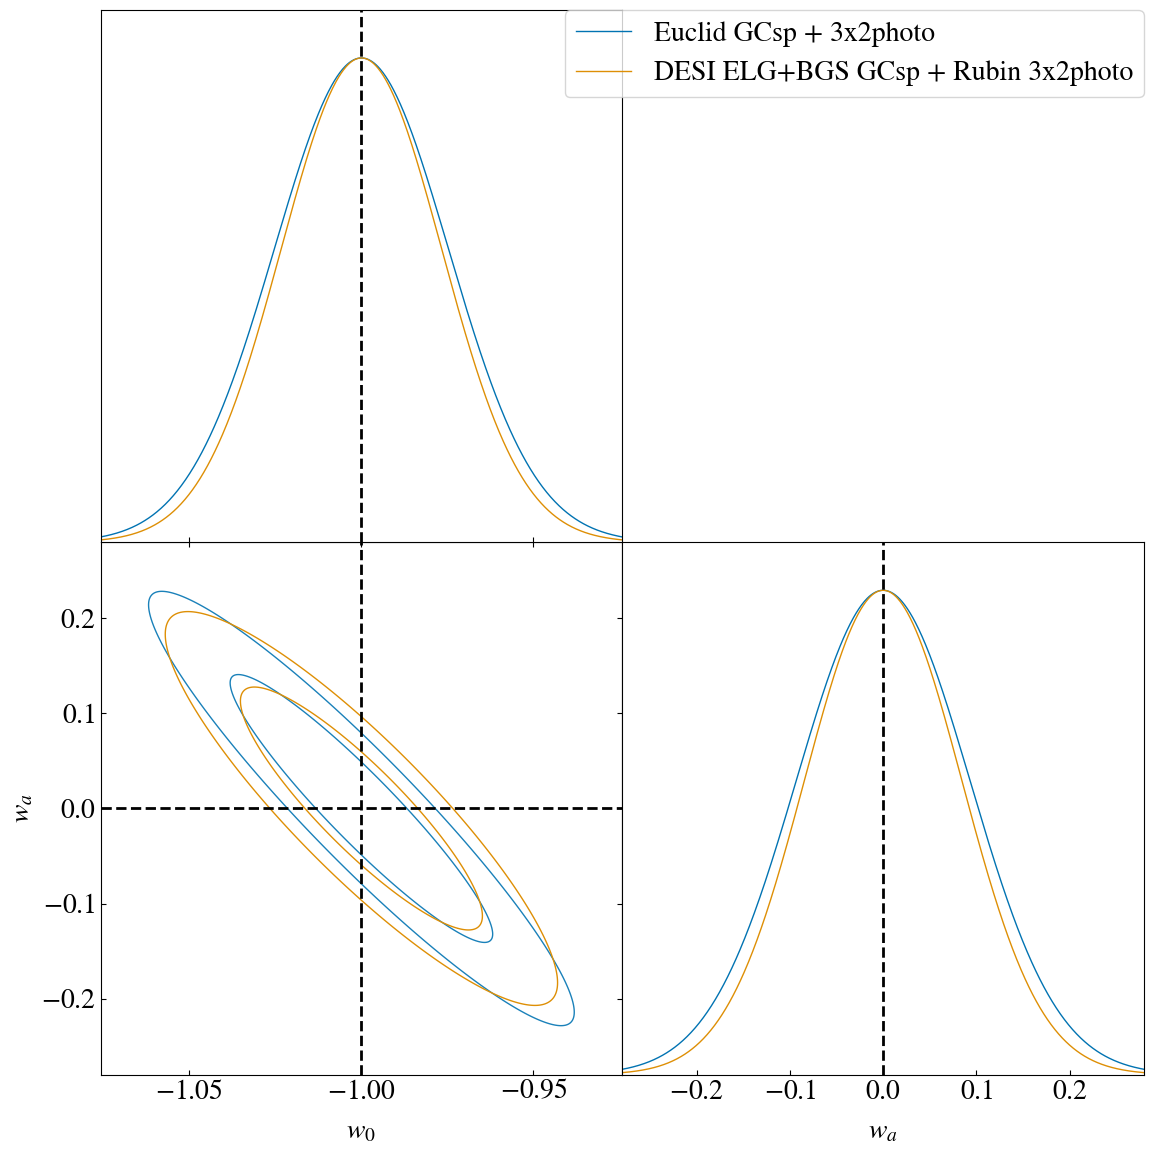

In [86]:
plot_options = {'fishers_list': [Fisher_Euclid_combined, Fisher_RubinDESI_combined], 
                'colors': snscolors,
                'fish_labels': ['Euclid GCsp + 3x2photo', 'DESI ELG+BGS GCsp + Rubin 3x2photo'],
                'filled': False,
                'plot_pars': ['w0','wa'],
                'axis_custom_factors': {'all':3},  ## Axis limits cover 3-sigma bounds of first Fisher matrix
                'plot_method': 'Gaussian',
                'file_format': '.pdf',   ##file format for all the plots
                'outpath' : './plots/',  ## directory where to store the files, if non-existent, it will be created
                'outroot':'Euclid-Rubin-DESI-combined_w0wa-only'  ## file name root for all the plots, extra names can be added individually
                } 

fish_plotter = fpp.fisher_plotting(**plot_options)
fish_plotter.plot_fisher(filled=False)